# Análise exploratória de dados

Baseado no material original [_Exploratory Data Analysis_](https://nbviewer.jupyter.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)

## Introdução

### Definição

A análise exploratória de dados é a ação de entender o conjunto de dados sumarizando suas principais características e provavelmente traçando um gráfico. Normalmente o procedimento envolve entender o conjunto de dados e obter _insights_ sobre os elementos de negócio que compõem o conjunto de dados. Tudo se inicia com a definição de um problema de negócios, que tentará ser respondido com o conjunto de dados.

### Como realizar análise exploratória?

Essa é a pergunta que todos querem saber a resposta, ainda que não seja única. O fato é que cada análise depende do conjunto de dados que será utilizado, ainda que, ao longo do tutorial, vamos tentar explorar alguns dos métodos mais comuns.

### Conjuntos de dados utilizados

Para o exemplo vamos utilizar o conjunto de dados de carros, que pode ser obtido [nesse endereço](https://drive.google.com/file/d/16kc3tx95leTWhpRvtx0MyQXmWjqSmSwR/view?usp=sharing) (link exclusivo para alunos do UniCEUB) ou no [endereço original aqui](https://www.kaggle.com/CooperUnion/cardataset) (kaggle).

## 1. Ajustes

Vamos importar as bibliotecas obrigatórias e configurar o ambiente.

In [60]:
home <- path.expand("~")
lib_dir <- file.path(file.path(home, "R"), "lib")
dir.create(lib_dir, showWarnings = FALSE)

library(utils)
.libPaths(c(lib_dir, .libPaths()))

# libraries needed for these examples
install.packages("tidyverse")
library(tidyverse)

install.packages("matrixStats")
library(matrixStats)


The downloaded binary packages are in
	/var/folders/pj/q06rg07s0ylcwm8vw7s2s6lc0000gp/T//RtmpJkodf6/downloaded_packages

The downloaded binary packages are in
	/var/folders/pj/q06rg07s0ylcwm8vw7s2s6lc0000gp/T//RtmpJkodf6/downloaded_packages



Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count




## 2. Carregar os dados no dataframe

A utilização de dados foi objeto da Aula 02. Baixe o arquivo e carregue na pasta `data` dentro do projeto.

In [71]:
df <- read_csv("data/data.csv")
df

Parsed with column specification:
cols(
  Make = col_character(),
  Model = col_character(),
  Year = col_double(),
  `Engine Fuel Type` = col_character(),
  `Engine HP` = col_double(),
  `Engine Cylinders` = col_double(),
  `Transmission Type` = col_character(),
  Driven_Wheels = col_character(),
  `Number of Doors` = col_double(),
  `Market Category` = col_character(),
  `Vehicle Size` = col_character(),
  `Vehicle Style` = col_character(),
  `highway MPG` = col_double(),
  `city mpg` = col_double(),
  Popularity = col_double(),
  MSRP = col_double()
)



Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500
BMW,1 Series,2012,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
BMW,1 Series,2012,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
BMW,1 Series,2012,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
BMW,1 Series,2012,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,36900


Observe as primeiras colunas e os tipos de dados que foram carregados.

## 3. Remover colunas irrelevantes

O próximo passo em cada análise exploratória depende muito do tipo de dados em questão e da análise em questão. Para o caso dos carros, não estamos interessados em analisar os dados dos campos _Engine Fuel Type, Market Category, Vehicle style, Popularity, Number of doors, Vehicle Size_ , então é seguro reomvê-los para tornar a análise mais clara.

Para remover os dados, vamos utilizar a função `select` e o operador `-` para remover as colunas que não desejamos

In [72]:
df <- select (df,-c('Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'))
df

Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,34500
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,31200
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,26,17,44100
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,28,20,39300
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,36900


## 4. Renomear as colunas

Para tornar os dados mais visíveis, vamos renomear as colunas e diminuir seu tamanho. Vai facilitar a geração dos relatórios depois.

In [73]:
df <- rename(df, "HP" = "Engine HP",  "Cylinders" = "Engine Cylinders",  "Transmission" = "Transmission Type",  "Drive Mode" = "Driven_Wheels", "MPG-H" = "highway MPG",  "MPG-C" = "city mpg",  "Price" = "MSRP")
df

Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,34500
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,31200
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,26,17,44100
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,28,20,39300
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,36900


## 5. Removendo linhas duplicadas

Em datasets muito grantes, é bastante comum que os dados estejam duplicados. Observe o número de linhas antes e depois da remoção das linhas duplicadas.

In [74]:
df <- distinct(df)
df

Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,34500
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,31200
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,26,17,44100
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,28,20,39300
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,36900


## 6. Removendo os valores nulos ou que estão faltando

O procedimento é bastante parecido com o anterior, mas antes todos os valores que faltam são detecatados, para depois serem removidos. A remoção dos valores facilita o cálculo de algums funções estatísticas, como a média. 

Vamos utilizar a função `sapply` para contar os valores nulos por coluna, imprimindo o nome da coluna.

In [75]:
sapply(df, function(x) sum(is.na(x)))

Make        Model         Year           HP    Cylinders Transmission 
           0            0            0           69           30            0 
  Drive Mode        MPG-H        MPG-C        Price 
           0            0            0            0

In [76]:
library(tidyr)
df %>% drop_na()

Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,34500
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,31200
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,26,17,44100
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,28,20,39300
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,36900


## 7. Detecção de _outliers_

Um _outlier_ é um ponto muito diferente do conjunto de pontos. A diferença pode variar desde muito grande até pequena para análise, constituindo numa das principais razões para reduzir a acurácia dos modelos. Assim, normalmente é uma boa ideia removê-los para aumentar a eficiência da análise.

Na maior parte dos casos, a utilização de gráficos como o _box plot_ auxiliam a visualização dos _outliers_. O gráfico a seguir apresenta uma análise dos campos HP e Pryce. É possível observar, nos gráficos,  que alguns pontos estão do lado de fora, representando os _outliers_ que queremos encontrar.

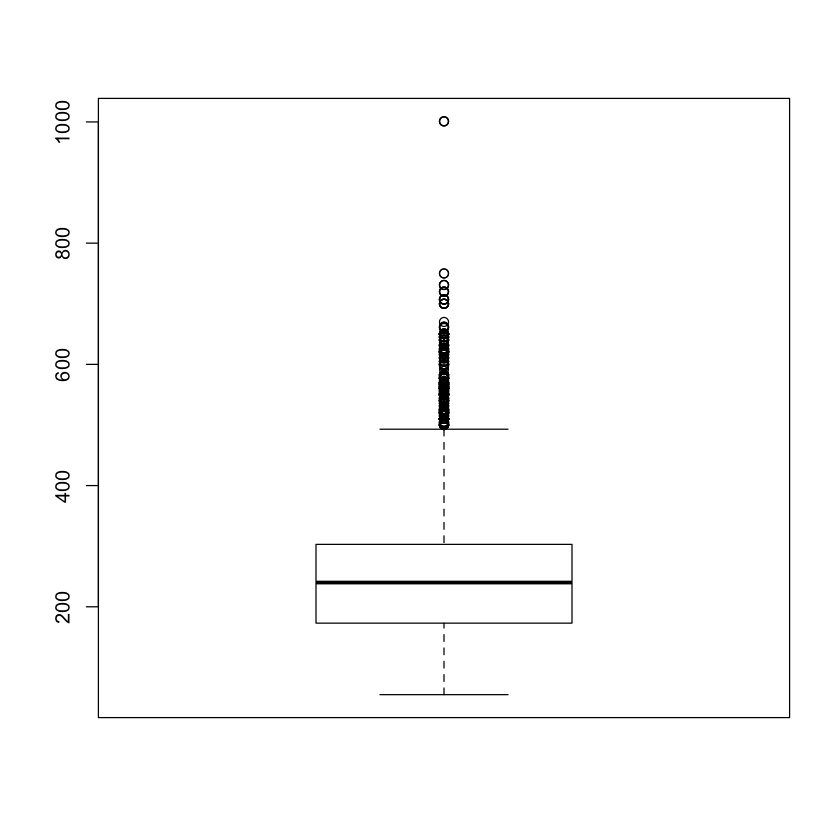

In [77]:
boxplot(df$HP)

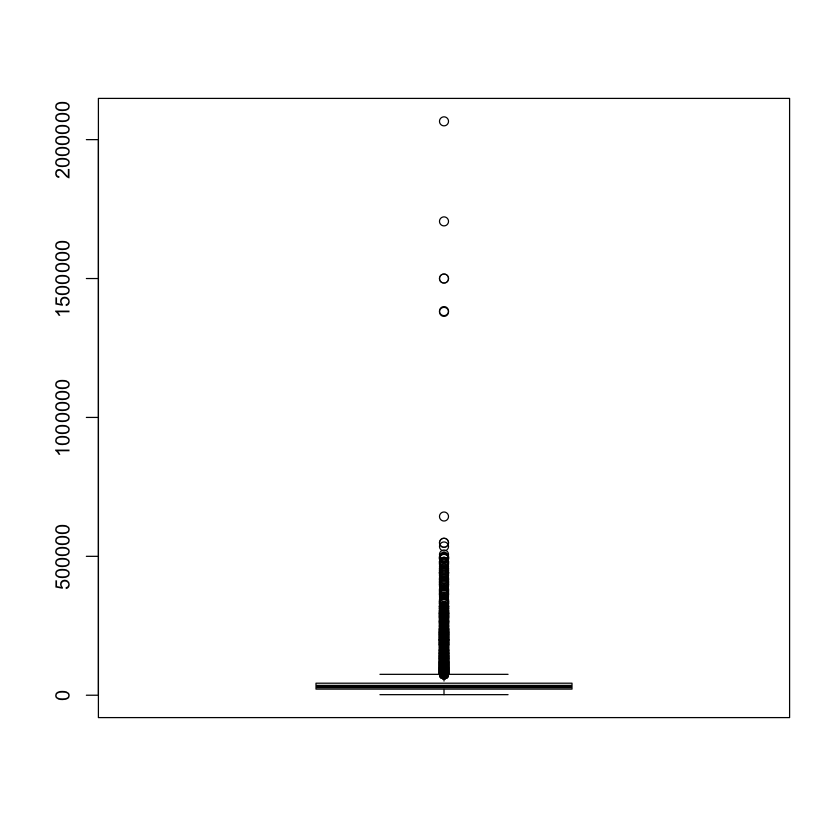

In [79]:
boxplot(df$Price)

Agora vamos remover os _outliers_ vistos no gráfico para cada um dos campos utilizando a função `which`.

In [81]:
outliers_hp <- boxplot(df$HP, plot=FALSE)$out
df <- df[-which(df$HP %in% outliers_hp),]

outliers_price <- boxplot(df$Price, plot=FALSE)$out
df <- df[-which(df$Price %in% outliers_price),]

df

Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BMW,1 Series M,2011,335,6,MANUAL,rear wheel drive,26,19,46135
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,19,40650
BMW,1 Series,2011,300,6,MANUAL,rear wheel drive,28,20,36350
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,29450
BMW,1 Series,2011,230,6,MANUAL,rear wheel drive,28,18,34500
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,31200
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,26,17,44100
BMW,1 Series,2012,300,6,MANUAL,rear wheel drive,28,20,39300
BMW,1 Series,2012,230,6,MANUAL,rear wheel drive,28,18,36900


## 8. Desenhe diferentes _features_ para comparar uma contra a outra (dispersão vs histograma)

### Histograma

O histograma se refere à frequência de palavras no intervalo. No caso vamos agrupar por fabricantes, porque normalmente é importante saber quem fabrica mais carros.

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


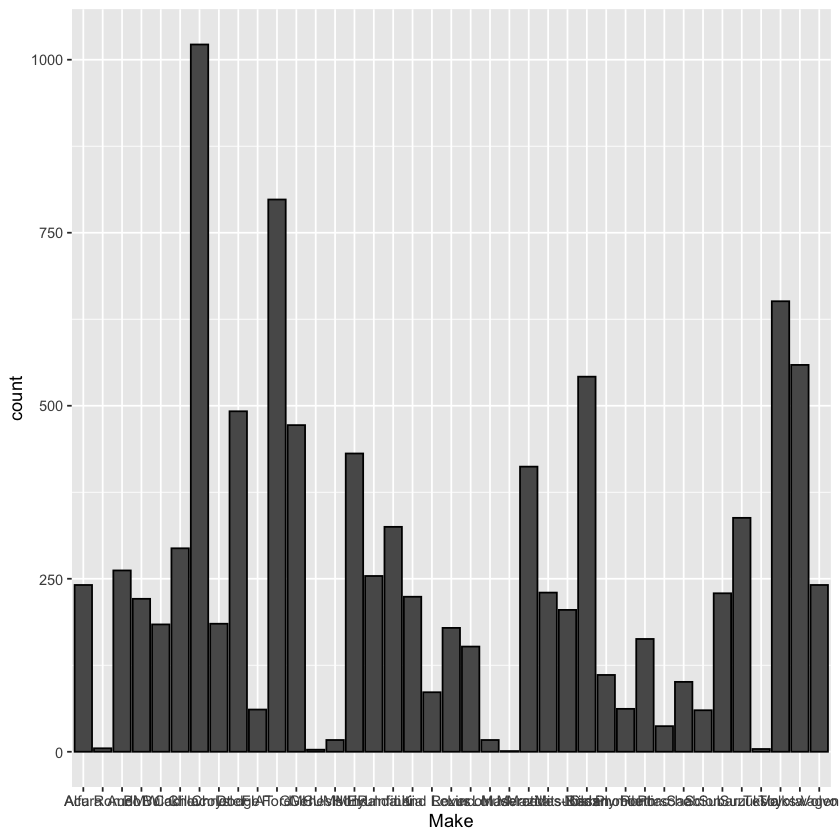

In [99]:
ggplot(df, aes(Make)) +
  geom_histogram(color = "black", stat='count')

## 9. Mapas de calor

Muito útil para encontrar correlação entre variáveis. Note que só é possível encontrar correlação entre variáveis numéricas.

In [111]:
df_cor <- cor(select(df, c('Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C', 'Price')))
df_cor

heatmap(df_cor, scale = "row")

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.0000000,NA,NA,0.29206578,0.22581126,0.65934268
HP,NA,1,NA,NA,NA,NA
Cylinders,NA,NA,1,NA,NA,NA
MPG-H,0.2920658,NA,NA,1.00000000,0.87021472,-0.02101275
MPG-C,0.2258113,NA,NA,0.87021472,1.00000000,-0.04768736
Price,0.6593427,NA,NA,-0.02101275,-0.04768736,1.00000000


ERROR: Error in hclustfun(distfun(x)): NA/NaN/Inf in foreign function call (arg 10)
